In [157]:
from rsplib import RSPEngine, RSPPublisher, Stream, rdf_table,load_graph, accessURL

In [158]:
jasper = RSPEngine("http://jasper:8181/jasper")

In [159]:
jasper.tasks()

[]

In [389]:
qid = 'redyellow'
tbox = 'https://raw.githubusercontent.com/riccardotommasini/colorwave/master/colors.owl'
frmt = 'JSON'
body = '''
PREFIX colors: <http://www.streamreasoning.org/ontologies/2018/9/colors#>
SELECT (COUNT(?r) AS ?cntr) (count(?g) AS ?cnty) ((?cntr>?cntg) as ?moreRedsThanYellow)
FROM NAMED WINDOW <cw> ON <http://redstream:1255/red> [RANGE PT15S STEP PT5S]
WHERE {
    { WINDOW <cw> { ?r a colors:Red .} }
    UNION 
    { WINDOW <cw> { ?g a colors:Yellow .} }
}

    '''

In [390]:
jasper.create(qid, body, tbox, frmt)

http://host.docker.internal:9999/jasper/queries/redyellow

In [391]:
redyellow_q = jasper.getq(qid)
redyellow_q

http://host.docker.internal:9999/jasper/queries/redyellow

In [392]:
jasper.streams()

[http://host.docker.internal:9999/jasper/streams/redyellow,
 http://redstream:1255/red]

In [393]:
redyellow_stream = redyellow_q.stream()

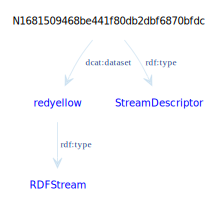

In [394]:
from rsplib.drawgraph import draw_graph
from IPython.display import display_html, Javascript, SVG, Image, display_svg,display_png

data, metadata = draw_graph(redyellow_stream.g, 'svg')
display_svg(data['image/svg+xml'], raw=True)

In [395]:
r = jasper.expose(qid, 'HTTP', retention=5)

In [396]:
endpoint = r.endpoints()[0]
endpoint

GET http://host.docker.internal:10000/jasper/streams/redyellow/observers/1383920200

In [444]:
df = endpoint.call()

In [445]:
df=df.dataframe()

In [446]:
%matplotlib inline
import pandas as pd

df1 = df[['cntr','cnty']]

cntg_mean = df1['cntr'].mean()
cntr_mean = df1['cnty'].mean()


In [448]:
cntg_mean

1.0

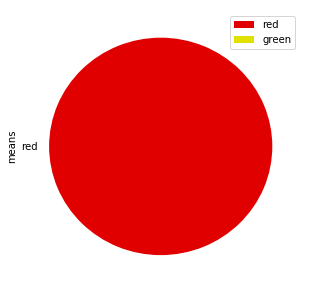

In [447]:
df = pd.DataFrame({'means': [cntg_mean, cntr_mean]}, index=['red', 'green'])
plot = df.plot.pie(y='means', colors=["#e10000", "#e1e100"], figsize=(5, 5))

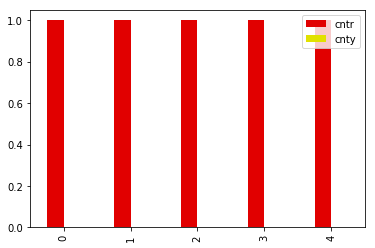

In [449]:
df1.plot.bar(color=["#e10000", "#e1e100"])

In [18]:
jasper.delete(qid)

{
    "@id": "queries/redgreen",
    "@type": "vprov:Task",
    "prov:generated": {
        "@id": "streams/redgreen"
    },
    "prov:uses": {
        "@id": "http://streamhub:9292/streamhub/streams/colorstream"
    },
    "@context": {
        "@base": "http://jasper:8181/jasper/",
        "rdf": "http://www.w3.org/1999/02/22-rdf-syntax-ns#",
        "vsd": "http://w3id.org/rsp/vocals-sd#",
        "vocals": "http://w3id.org/rsp/vocals#",
        "xsd": "http://www.w3.org/2001/XMLSchema#",
        "format": "http://www.w3.org/ns/formats/",
        "rdfs": "http://www.w3.org/2000/01/rdf-schema#",
        "vprov": "http://w3id.org/rsp/vocals-prov#",
        "dcat": "http://www.w3.org/ns/dcat#",
        "prov": "http://www.w3.org/ns/prov#"
    }
}